**Exercise 1**: 

(a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot the point cloud of the data set highlighting each class.

(b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on the two-dimensional dataset.

In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(training_data.shape)
print(test_data.shape)

temp_x = np.concatenate((X_train, y_train.reshape((7291,1))), axis = 1)
temp_y = np.concatenate((X_test, y_test.reshape((2007,1))),axis = 1)

data = np.concatenate((temp_x, temp_y),axis = 0)

# temp = []
# for i in range(data.shape[0]):
#     temp.append(data[i].reshape(257,1))
# temp = np.asarray(temp)
# data = temp
print(data.shape)

(7291, 256)
(7291,)
(2007, 256)
(2007,)
(7291, 258)
(2007, 257)
(9298, 257)


In [145]:
import random

def normalize(v): 
    norm = np.linalg.norm(v)

    if norm == 0: 
        return v 
    return v / norm

def PCA(data):
    # initialize w 
    w = np.ones((257, 1))
    counter = 1
    learning_rate = 0.2
    
    while(counter <= 100):
        # pick a random x
        random_number = random.randint(0, data.shape[1])
        x = data[random_number].reshape(257,1)
        
        # update w 
        temp = w + learning_rate * np.dot(w.T, x) * (x - (np.dot(w.T, x)) * w)
        w = temp
        
        # normalize w
        w = normalize(w)
        learning_rate = learning_rate / counter ** 0.5
        
        counter += 1
    #print(counter)
    return w

# (257, 1)
print(PCA(data))
#print(data[1].shape)

[[-8.37994887e-02]
 [-8.37994887e-02]
 [-8.37994887e-02]
 [-8.46069013e-02]
 [-8.81179611e-02]
 [-8.78569718e-02]
 [-5.67071087e-02]
 [ 9.30442233e-03]
 [-3.06080168e-02]
 [-7.42124677e-02]
 [-8.34146053e-02]
 [-8.37616232e-02]
 [-8.37962412e-02]
 [-8.37958967e-02]
 [-8.37992410e-02]
 [-8.37994887e-02]
 [-8.37994887e-02]
 [-8.34525807e-02]
 [-8.07669048e-02]
 [-8.39398539e-02]
 [-8.71629542e-02]
 [-8.05091590e-02]
 [-4.73109313e-02]
 [ 4.70295773e-02]
 [ 3.88988992e-02]
 [-2.49866765e-02]
 [-5.75703607e-02]
 [-8.25270930e-02]
 [-8.37912316e-02]
 [-8.37917474e-02]
 [-8.37931098e-02]
 [-8.37989933e-02]
 [-8.37994887e-02]
 [-7.92521598e-02]
 [-7.69222687e-02]
 [-7.97003765e-02]
 [-8.41913779e-02]
 [-4.86641157e-02]
 [ 1.31408528e-02]
 [ 7.98298421e-02]
 [ 6.08163135e-02]
 [-7.50008175e-03]
 [ 5.21507965e-03]
 [-4.98301701e-02]
 [-8.04402320e-02]
 [-8.37917455e-02]
 [-8.37917474e-02]
 [-8.37965199e-02]
 [-8.37057869e-02]
 [-7.71905151e-02]
 [-7.65242295e-02]
 [-5.99413444e-02]
 [-1.2792858

In [146]:
# run until 2 dimensions
for i in range(257-2):
    w = PCA(data)
    for i in range(9298):        
        data[i] = (data[i].reshape(257,1) - (np.dot(w.T, data[i]) * w)).reshape((257, ))
print(data)

[[ 0.03521711 -0.01000062 -0.04333636 ...  0.00956548  0.05742745
  -0.04843767]
 [-0.17307591 -0.25623198 -0.23068549 ... -0.07591256 -0.13653414
   0.00546558]
 [-0.12137287 -0.23104514 -0.22238626 ... -0.06710114 -0.02834965
   0.13665091]
 ...
 [-0.06933643 -0.09460832 -0.10826423 ... -0.12508735 -0.05948887
  -0.16211415]
 [ 0.02833031  0.05227249  0.02664954 ... -0.16755    -0.0068437
   0.01069638]
 [-0.07262545 -0.0567946  -0.03859404 ...  0.0031255  -0.0382545
  -0.21851081]]


In [100]:
print(data.shape)

(9298, 257)


In [101]:
# this class record visit list
class visitlist:
    def __init__(self, count=0):
        # record unvisited points
        self.unvisitedlist = [i for i in range(count)]
        # record visited points
        self.visitedlist = list()
        self.unvisitednum = count
        
    def visit(self, point):
        self.visitedlist.append(point)
        self.unvisitedlist.remove(point)
        self.unvisitednum -= 1

In [102]:
# I changed the axis to 0, to calculate the distance between two points
def euclidean_distance(x_1, x_2):
      return np.sqrt(np.sum((x_1-x_2)**2, axis = 0)) 

# return the Neighbours of p
def rangeQuery(p, eps, dataset):
    number_Points = dataset.shape[0]
    return [i for i in range(number_Points) if euclidean_distance(dataset[i], dataset[p])<=eps]

def dbscan(dataset, eps, minPts):
    # total number of points
    number_Points = dataset.shape[0]
    visit_Points = visitlist(count=number_Points)
    # initialize the cluster, the cluster label is k
    k = -1
    Cluster = [-1 for i in range(number_Points)]
    while(visit_Points.unvisitednum > 0):
        # randomly select an unvisited point
        point = random.choice(visit_Points.unvisitedlist)
        visit_Points.visit(point)
        Neighbours = rangeQuery(point, eps, dataset)
        # at least MinPoints in the neighborhood
        if len(Neighbours) >= minPts:
            k += 1
            Cluster[point] = k
            for point1 in Neighbours:
                if point1 in visit_Points.unvisitedlist:
                    visit_Points.visit(point1)
                    # If there are at least MinPts points 
                    # in the neighborhood of point1, 
                    # add these points to N
                    newN = rangeQuery(point1, eps, dataset)
                    if len(newN) >= minPts:
                        for i in newN:
                            if i not in Neighbours:
                                Neighbours.append(i)
                    # if point1 is not yet a member of any cluster, add Point1 to Cluster
                    if Cluster[point1] == -1:
                        Cluster[point1] = k                
        # else noise point 
        else:
            Cluster[point] = -1
    # Until all points have been visited
    return Cluster

In [103]:
eps = 1.7        
minPoints = 3
dataset = data
Cluster = dbscan(dataset, eps, minPoints)

print("data size = 500")
plt.scatter(dataset[:,0], dataset[:,1], c = Cluster)
plt.axis('equal')
plt.show()

KeyboardInterrupt: 

**Exercise 2**: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset1.Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37
(5,)


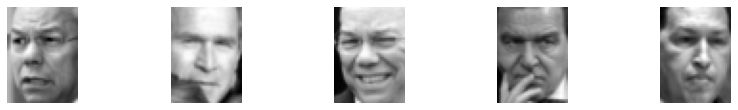

In [10]:
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_faces(X):
    num_samples = 5
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = sample_digits[i].reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_faces(X)